# **Ranging and RANSAC**

## **Overview**

RANSAC (Random Sample Consensus) is a robust regression method used to fit models to datasets that contain outliers. In this exercise, we use RANSAC to locate walls from LiDAR data collected by a robot in a hallway. The data consists of distances measured by a LiDAR as it performs a full 360-degree scan. Using RANSAC, we can find the best-fit lines representing the hallway walls, even in the presence of noise and outliers.

### **Purpose**

The purpose of this exercise is to:

- Convert raw LiDAR data into Cartesian coordinates.
- Use RANSAC to fit a line to the data, representing one wall in the hallway.
- Identify inliers and outliers in the data and use a second RANSAC fit to find another wall using the outliers from the first fit.
- Visualize the results by plotting the LiDAR data along with the RANSAC-fitted lines.

### **Theory**

1. **LiDAR Data**: 
   - The LiDAR (Light Detection and Ranging) sensor measures distances to surrounding objects by emitting laser pulses and measuring the time it takes for them to return. This provides a set of distance measurements at different angles. In this exercise, the angles range from 135° to -135°, covering 270° of rotation.
   
2. **Cartesian Coordinate Conversion**: 
   - LiDAR data is collected in polar coordinates (angle and distance). To visualize the data, we must convert it to Cartesian coordinates:
     - \(x = r \times \cos(\theta)\)
     - \(y = r \times \sin(\theta)\)
     where \(r\) is the measured distance, and \(\theta\) is the corresponding angle.

3. **RANSAC (Random Sample Consensus)**:
   - RANSAC is an iterative method to estimate parameters of a model by randomly sampling the data. It is particularly robust to outliers, making it useful for noisy datasets such as LiDAR data, where sensor noise and obstacles can create outliers.
   - In this exercise, we fit two lines using RANSAC: one for each hallway wall. The first line is fitted using all the data, and the second line is fitted using the outliers from the first RANSAC fit.

### **Steps**

1. **LiDAR Data Import**:
   - The `laser.csv` file contains the distance measurements from the LiDAR sensor in a single 360° rotation. The angles start at 135° and end at -135°, with each measurement corresponding to a specific angle.

2. **Conversion to Cartesian Coordinates**:
   - We use trigonometric functions to convert the polar LiDAR data into Cartesian coordinates (x, y), which can then be plotted to visualize the robot's surroundings.

3. **RANSAC Fit for the First Wall**:
   - Using the Cartesian coordinates, we apply the RANSAC algorithm to find the best-fit line representing one wall in the hallway. The RANSAC algorithm fits the line while ignoring outliers, which are points that do not align with the detected wall.

4. **Identifying Inliers and Outliers**:
   - After fitting the first wall using RANSAC, we use the `inlier_mask_` attribute of the RANSAC model to identify which points were considered inliers and which were considered outliers.

5. **RANSAC Fit for the Second Wall**:
   - The outliers from the first RANSAC fit are likely to represent another wall or obstacles in the scene. We perform a second RANSAC fit on these outliers to find another wall.

6. **Visualization**:
   - Finally, the fitted lines for both walls are plotted alongside the LiDAR points. We also visualize the inliers and outliers to see how RANSAC filtered the data.

### **Functions and Parameters**

1. **`np.linspace()`**:
   - **Purpose**: Generates an array of angles corresponding to the LiDAR measurements, ranging from 135° to -135°.
   - **Returns**: A linearly spaced array of angles in radians.

2. **`ransac = linear_model.RANSACRegressor()`**:
   - **Purpose**: Initializes a RANSAC regressor.
   - **Returns**: A RANSAC model object that can be fitted to the data.

3. **`ransac.fit()`**:
   - **Purpose**: Fits the RANSAC regressor to the LiDAR data.
   - **Parameters**:
     - `X`: The x-coordinates of the LiDAR data points.
     - `y`: The y-coordinates of the LiDAR data points.
   - **Returns**: A fitted RANSAC model that contains the inliers and the best-fit line.

4. **`ransac.inlier_mask_`**:
   - **Purpose**: Identifies which points were considered inliers in the RANSAC fit.
   - **Returns**: A boolean mask where `True` indicates that the point is an inlier.

5. **`ransac.predict()`**:
   - **Purpose**: Predicts the y-values for a set of x-values using the fitted RANSAC model.
   - **Returns**: The predicted y-values for the given x-values.

### **Conclusion**

This exercise illustrates how RANSAC can be used to robustly fit models to noisy data with outliers. By fitting two lines to the LiDAR data, we can approximate the walls of the hallway. The first RANSAC fit identifies one wall, while the second RANSAC fit uses the outliers from the first fit to locate the second wall. This process is crucial in applications such as robot navigation and mapping, where accurate environment modeling is needed.


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

If you get an error from importing sklearn, then you will have to install it using:
conda install scikit-learn

For the exercise we will be using the data taken from a lidar by a robot in a hallway. The data is saved in `laser.csv` and we can import this in Python using numpy as such:

In [2]:
laser = np.genfromtxt('laser.csv', delimiter=',')

The file contains only a single rotation of the lidar. You can open the file in any text editor to get a look at the data. Each number in the file is the distance measured in meters. The lidar starts measuring at 135 degrees and ends at -135 degrees and it rotates the same amount between each measurement. 

## Exercise 3.1
Convert the data in the csv file to x and y coordinates in a Carthesian coordinate system and plot the result using matplotlib.

Hint: Use [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) instead of plt.plot in order to show every measurement as a point. 

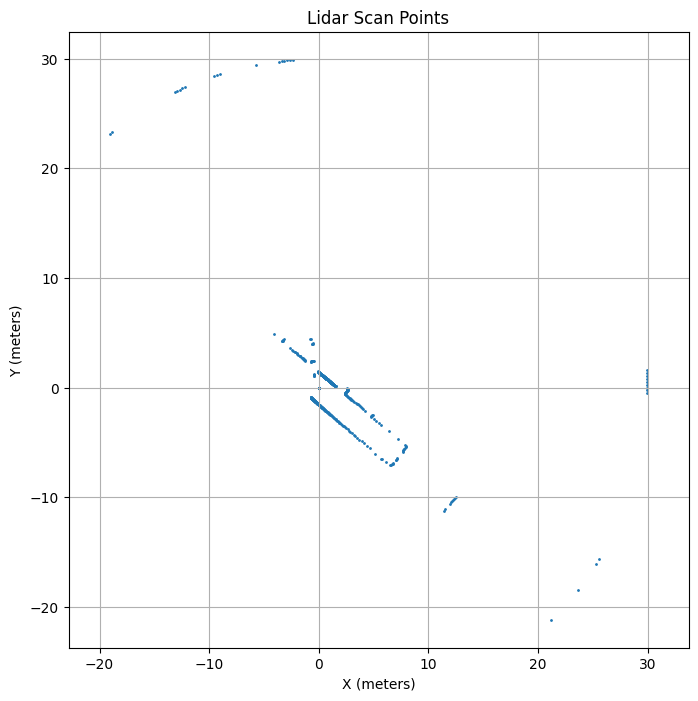

In [3]:
# Define the angles corresponding to each measurement
angles = np.linspace(np.deg2rad(135), np.deg2rad(-135), len(laser))

# Convert to Cartesian coordinates
x = laser * np.cos(angles)
y = laser * np.sin(angles)

# Plot the result using scatter
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=1)  # s=1 sets a small marker size for each point
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.title('Lidar Scan Points')
plt.grid(True)
plt.axis('equal')  # To ensure the plot is not distorted
plt.show()


## Exercise 3.2

We would like to locate one of the walls in the dataset. To do so we will use [Ransac](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html) to fine the best line fit in the noisy data. A Ransac regressor is initialized the following way using sklearn:

In [4]:
ransac = linear_model.RANSACRegressor()

Now that we have our Ransac regressor we can fit it to a dataset (x,y):

In [5]:
# Reshape the x data to be a 2D array, which is required by RANSAC
X = x.reshape(-1, 1)

# Fit the RANSAC regressor to the data
ransac.fit(X, y)

RANSACRegressor()

Finally, to get the fitted line we can use the predict function. As an argument this takes the x values in which the line will be predicted:

In [6]:
# Get the line parameters from the fitted RANSAC model
line_x = np.arange(X.min(), X.max())  # Create a range of x values for plotting the fitted line
line_y_ransac = ransac.predict(line_x.reshape(-1, 1))  # Predict the y values using the fitted model

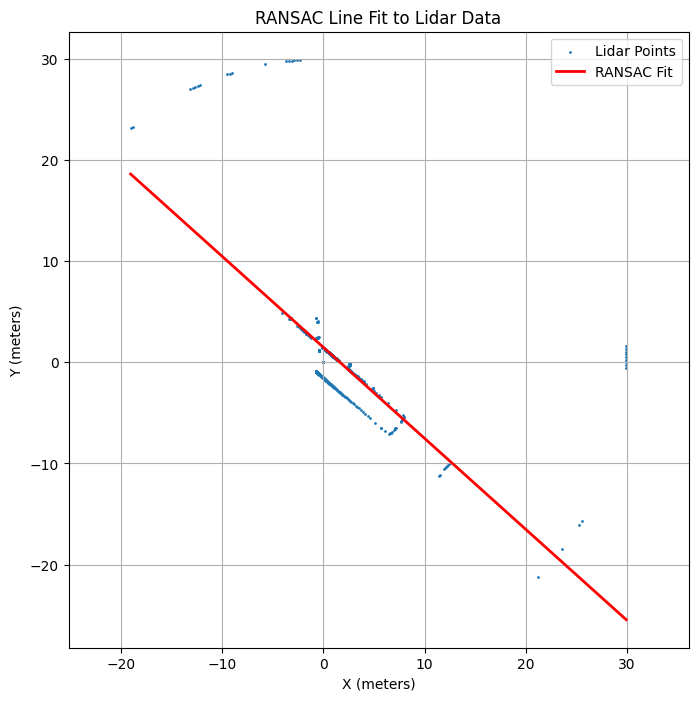

In [7]:
# Plot the data points and the fitted line
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=1, label='Lidar Points')  # Lidar points
plt.plot(line_x, line_y_ransac, color='r', linewidth=2, label='RANSAC Fit')  # RANSAC line fit
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.title('RANSAC Line Fit to Lidar Data')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Plot the line on top of the scatterplot from before to see the fit.

## Exercise 3.3

To see which data points were used to make the line fit and which were deemed outliers, we can use the function ransac.inlier_mask_

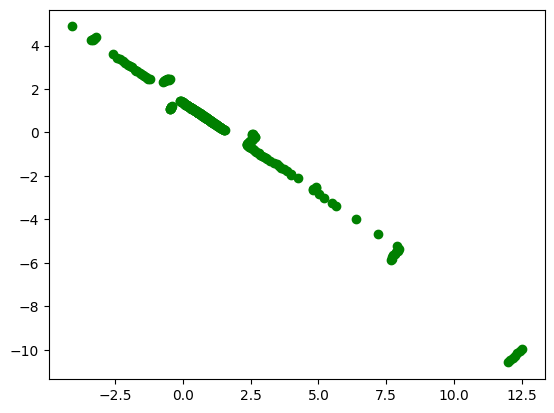

In [8]:
plt.scatter(x[ransac.inlier_mask_], y[ransac.inlier_mask_], color='green')

Find the second hallway wall using another Ransac fit and plot it together with the data points and the first ransac fit.

Hint: Use the outliers from the first Ransac.

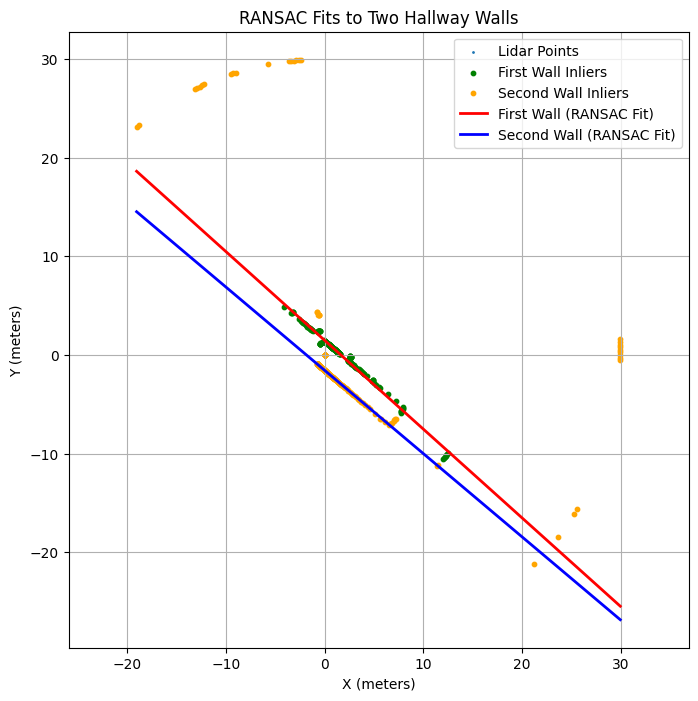

In [9]:
ransac2 = linear_model.RANSACRegressor()

# Find the second hallway wall
# Fit the second RANSAC regressor using the outliers from the first RANSAC
X_outliers = x[~ransac.inlier_mask_].reshape(-1, 1)
y_outliers = y[~ransac.inlier_mask_]

ransac2.fit(X_outliers, y_outliers)

# Get the line parameters for the second RANSAC fit
line_x2 = np.arange(X_outliers.min(), X_outliers.max())
line_y_ransac2 = ransac2.predict(line_x2.reshape(-1, 1))

# Plot the original data, the inliers from the first RANSAC, and the two fitted lines
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=1, label='Lidar Points')  # All lidar points
plt.scatter(x[ransac.inlier_mask_], y[ransac.inlier_mask_], color='green', s=10, label='First Wall Inliers')
plt.scatter(x[~ransac.inlier_mask_], y[~ransac.inlier_mask_], color='orange', s=10, label='Second Wall Inliers')

# Plot the first RANSAC fit line
plt.plot(line_x, line_y_ransac, color='red', linewidth=2, label='First Wall (RANSAC Fit)')

# Plot the second RANSAC fit line
plt.plot(line_x2, line_y_ransac2, color='blue', linewidth=2, label='Second Wall (RANSAC Fit)')

plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.title('RANSAC Fits to Two Hallway Walls')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()